In [4]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [5, 3]

### EJ1

* tomar 30 muestras de una distribucion bernoulli con parametro p=0.3

(a) estimador plug-in del devio estandar de la distribucion

(b) estimar error estandar via bootstrap

(c) estimar el intervalo de confianza del 95% usando los métodos normal, percentile
bootstrap, basic bootstrap y BCa.


In [5]:
sample = np.random.binomial(1, 0.3, 30)
sample

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1])

In [6]:
def var_pluging(sample):
    return (1 / len(sample)) * np.sum((sample - np.mean(sample)) ** 2)


sd_plugin = np.sqrt(var_pluging(sample))
sd_plugin

0.48189440982669857

In [7]:
def basic_bootstrap(sample, Func, N):
    theta_bootstrap = np.zeros(N)

    for i in range(N):
        sample_bootstrap = np.random.choice(sample, len(sample), replace=True)
        theta_bootstrap[i] = Func(sample_bootstrap)
    return theta_bootstrap

Text(0.5, 0, 'bootstraped standard deviation')

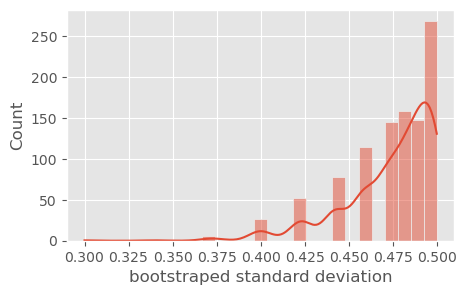

In [8]:
sd_bootstrap = basic_bootstrap(sample, var_pluging, 1000) ** 0.5

sns.histplot(sd_bootstrap, kde=True)
plt.xlabel("bootstraped standard deviation")

In [9]:
standard_error = np.std(sd_bootstrap)
print(
    "standard error: ", standard_error
)  # error estandar del desvio estandard de la muestra

standard error:  0.02634499641194716


In [10]:
# intervalo de confianza por metodo normal, como se puede observar arriba la distribucion en el bootstrap del SD_sample no es normal, va a ser una mala aproximacion.
alpha = 0.05


def normal_approximation_ci(bootstrapped_sample, alpha=0.05):
    z = st.norm.ppf(1 - (alpha / 2))
    lower = sd_plugin - z * standard_error
    upper = sd_plugin + z * standard_error
    return lower, upper


lower_normal, upper_normal = normal_approximation_ci(sd_bootstrap, alpha)
print("intervalo de confianza aproximacion normal: ", lower_normal, " ", upper_normal)

intervalo de confianza aproximacion normal:  0.4302591656864452   0.533529653966952


In [11]:
def percentile_aproximation_ci(bootstrapped_sample, alpha=0.05):
    lower = np.quantile(bootstrapped_sample, alpha / 2)
    upper = np.quantile(bootstrapped_sample, 1 - (alpha / 2))
    return lower, upper


lower_per, upper_per = percentile_aproximation_ci(sd_bootstrap, alpha)
print("intervalo de confianza aproximacion percentil: ", lower_per, " ", upper_per)

intervalo de confianza aproximacion percentil:  0.4000000000000001   0.5


In [12]:
(sample,)

(array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 0, 1]),)

In [13]:
# basic bootstrap CI AKA bootstrap pivotal CI

basic_bootstrap_CI = st.bootstrap(
    (sample,), np.std, confidence_level=1 - alpha, method="basic"
)
print("intervalo de confianza pivotal ", basic_bootstrap_CI.confidence_interval)
lower_basic, upper_basic = basic_bootstrap_CI.confidence_interval

intervalo de confianza pivotal  ConfidenceInterval(low=0.46378881965339713, high=0.5637888196533971)


In [14]:
bca_bootstrap_CI = st.bootstrap(
    (sample,), np.std, confidence_level=1 - alpha, method="bca"
)  # bias corrected and accelerated
print("intervalo de confianza bca ", basic_bootstrap_CI.confidence_interval)
lower_bca, upper_bca = bca_bootstrap_CI.confidence_interval

intervalo de confianza bca  ConfidenceInterval(low=0.46378881965339713, high=0.5637888196533971)


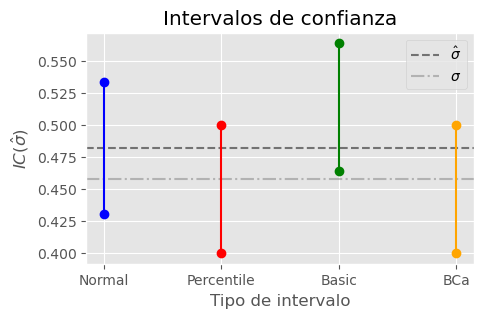

In [15]:
interval_names = ["Normal", "Percentile", "Basic", "BCa"]
plt.axhline(sd_plugin, color="k", ls="--", label="$\hat{\sigma}$", alpha=0.5)
plt.axhline((0.3 * 0.7) ** 0.5, color="grey", ls="-.", label="${\sigma}$", alpha=0.5)
plt.plot([1, 1], [lower_normal, upper_normal], "o-", color="blue")
plt.plot([2, 2], [lower_per, upper_per], "o-", color="red")
plt.plot([3, 3], [lower_basic, upper_basic], "o-", color="green")
plt.plot([4, 4], [lower_bca, upper_bca], "o-", color="orange")
plt.xticks([1, 2, 3, 4], labels=interval_names)
plt.xlabel("Tipo de intervalo")
plt.ylabel("$IC(\hat{\sigma})$")
plt.title("Intervalos de confianza")
plt.legend()
plt.show()

### EJ2

Considerar los datasets de los precios anuales de las acciones de The Coca-Cola Company y las
búsquedas en Google de “my cat scratched me” disponibles en https://shorturl.at/xIPSV.

(a) Encontrar el estimador plug-in del coeficiente de correlación entre ambos conjuntos de datos.

(b) Estimar su error estándar usando bootstrap.

(c) Encontrar un intervalo de confianza de nivel 0.95 usando los métodos normal, percentile
bootstrap, basic bootstrap y BCa


In [16]:
array_1 = np.array(
    [
        8,
        7.91667,
        19.8333,
        18.5833,
        29.0833,
        30.3333,
        35.4167,
        43.6667,
        37.25,
        45.75,
        47.1667,
        48.5,
        67.3333,
        79.3333,
        74.6667,
        85.6667,
    ]
)
array_2 = np.array(
    [
        30.73,
        22.7,
        28.58,
        32.94,
        35.08,
        36.99,
        41.12,
        42.26,
        42.34,
        41.5,
        45.91,
        46.94,
        55.32,
        54.27,
        58.82,
        63.56,
    ]
)
array_1_name = "Google searches for 'my cat scratched me'"
array_2_name = "The Coca-Cola Company's stock price (KO)"

In [17]:
# a)
def plugin_corr_coef(sample1, sample2):
    X_ = sample1 - sample1.mean()
    Y_ = sample2 - sample2.mean()
    return sum(X_ * Y_) / np.sqrt(np.sum(X_**2) * np.sum(Y_**2))


corr_coef = plugin_corr_coef(array_1, array_2)
print(f"coef de correlacion: {corr_coef:.4f}")

coef de correlacion: 0.9740


In [18]:
# b)
def two_paired_samples_bootstrap(sample_1, sample_2, Func, N):
    theta_bootstrap = np.zeros(N)
    number_of_samples = len(sample_1)

    for i in range(N):
        sample_index = np.random.choice(
            number_of_samples, number_of_samples, replace=True
        )
        theta_bootstrap[i] = Func(sample_1[sample_index], sample_2[sample_index])
    return theta_bootstrap


bootstrapped_corr_coef = two_paired_samples_bootstrap(
    array_1, array_2, plugin_corr_coef, 5000
)
corr_coef_SE = bootstrapped_corr_coef.std()
print(f"error standard del coef de correlacion: {corr_coef_SE:.4f}")

error standard del coef de correlacion: 0.0103


<Axes: ylabel='Count'>

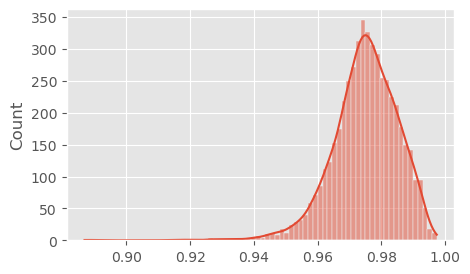

In [19]:
sns.histplot(bootstrapped_corr_coef, kde=True)

In [20]:
# C)
# normal aprox CI
alpha = 0.05

z = st.norm.ppf(1 - (alpha / 2))
normal_lower = corr_coef - corr_coef_SE * z
normal_upper = corr_coef + corr_coef_SE * z

# percentile CI
percentile_lower, percentile_upper = st.bootstrap(
    (array_1, array_2),
    plugin_corr_coef,
    confidence_level=1 - alpha,
    method="percentile",
    paired=True,
).confidence_interval

# basic bootstrap CI (pivot)
basic_lower, basic_upper = st.bootstrap(
    (array_1, array_2),
    plugin_corr_coef,
    confidence_level=1 - alpha,
    method="basic",
    paired=True,
).confidence_interval

# Bca CI
bca_lower, bca_upper = st.bootstrap(
    (array_1, array_2), plugin_corr_coef, confidence_level=1 - alpha, paired=True
).confidence_interval

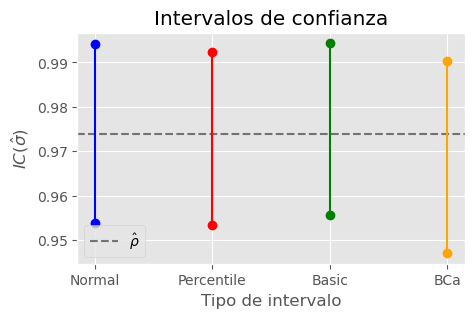

In [21]:
interval_names = ["Normal", "Percentile", "Basic", "BCa"]
plt.axhline(corr_coef, color="k", ls="--", label="$\hat{\\rho}$", alpha=0.5)
plt.plot([1, 1], [normal_lower, normal_upper], "o-", color="blue")
plt.plot([2, 2], [percentile_lower, percentile_upper], "o-", color="red")
plt.plot([3, 3], [basic_lower, basic_upper], "o-", color="green")
plt.plot([4, 4], [bca_lower, bca_upper], "o-", color="orange")
plt.xticks([1, 2, 3, 4], labels=interval_names)
plt.xlabel("Tipo de intervalo")
plt.ylabel("$IC(\hat{\sigma})$")
plt.title("Intervalos de confianza")
plt.legend()
plt.show()

### EJ3

Sean 𝑋1, . . . , 𝑋𝑛 variables aleatorias Normales(𝜇, 1). Sea 𝜃 = 𝑒^𝜇 y sea 𝜃∗ = 𝑒^𝑋. Crear un conjunto
de datos utilizando 𝜇 = 5 que tenga 𝑛 = 100 observaciones.

(a) Utilizar bootstrap para obtener el error estándar y el intervalo de confianza del 95% para 𝜃.

(b) Graficar histograma de las replicaciones bootstrap. Esto es una estimación de la distribución
de 𝜃. Comparar con la verdadera distribución de muestreo de 𝜃.

In [22]:
sample = np.random.normal(loc=5, scale=1, size=100)

In [23]:
def theta_hat_function(sample):
    return np.exp(sample).mean()


theta_hat = theta_hat_function(sample)
theta_hat

211.97187722236305

In [24]:
theta_hat_bootstrapped = basic_bootstrap(sample, theta_hat_function, 4000)
theta_hat_SE = theta_hat_bootstrapped.std()
theta_hat_SE

21.428379079449396

In [25]:
lower, upper = st.bootstrap(
    (sample,), theta_hat_function, confidence_level=0.95
).confidence_interval
print(lower, upper)

176.72772474107546 262.38912928791547


(0.0, 1000.0)

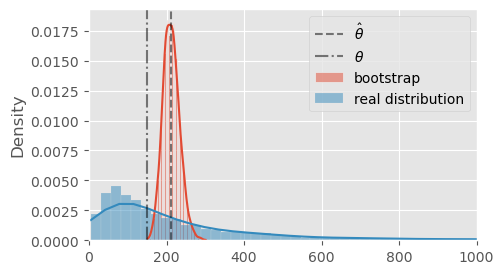

In [26]:
sns.histplot(theta_hat_bootstrapped, kde=True, label="bootstrap", stat="density")

real_distribution = np.exp(np.random.normal(loc=5, scale=1, size=5000))

sns.histplot(real_distribution, kde=True, label="real distribution", stat="density")

plt.axvline(theta_hat, color="k", ls="--", label="$\hat{\\theta}$", alpha=0.5)

plt.axvline(np.exp(5), color="k", ls="-.", label="${\\theta}$", alpha=0.5)

plt.legend()

plt.xlim(0, 1000)

### EJ4
a) En 1000 tiradas de moneda aparecen 560 caras y 440 cecas. ¿Es razonable suponer que la moneda es justa, es decir que la probabilidad de cara y de ceca son iguales?

In [27]:
positivos = 560
negativos = 440
N = positivos + negativos

p_hat = positivos / N
var_hat = p_hat * (1 - p_hat)

p_hat, var_hat

(0.56, 0.24639999999999998)

In [28]:
z_stat = (p_hat - 0.5) / (var_hat / N) ** 0.5

p_value = 2 * (1 - st.norm.cdf(abs(z_stat)))
p_value  # probabilidad de ver valor igual o mas extremo que el observado bajo la hipotesis nula
# la probabilidad es <0.05.

0.00013218377774104617

In [29]:
p_value = st.binomtest(positivos, n=N, p=0.5, alternative="two-sided")
p_value  # me da aproximadamente igual.

BinomTestResult(k=560, n=1000, alternative='two-sided', statistic=0.56, pvalue=0.00016504987055045286)

### EJ6

Se desea determinar si un dado de seis caras está cargado o no. Para ello se arroja el dado
1000 veces obteniéndose los siguientes resultados:

* Resultado del dado 1 2 3 4 5 6

* Frecuencia 160 180 150 170 190 150

In [30]:
n1 = 160
n2 = 180
n3 = 150
n4 = 170
n5 = 190
n6 = 150

Text(0, 0.5, 'alpha, probabilidad de rechazo')

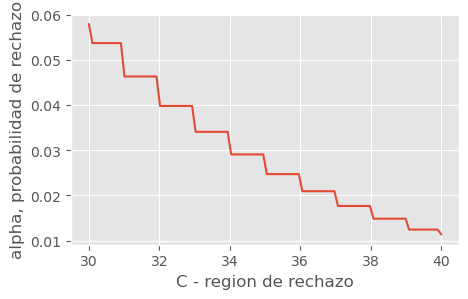

In [84]:
def alpha(c):
    P1 = 1 - st.binom(1000, 0.5).cdf(500 + c)
    P2 = st.binom(1000, 0.5).cdf(500 - c)
    return P1 + P2


test_x = np.linspace(30, 40, 100)  # controlo el "zoom"
test_alpha = [alpha(i) for i in test_x]

plt.plot(test_x, test_alpha)
plt.xlabel("C - region de rechazo")
plt.ylabel("alpha, probabilidad de rechazo")

In [83]:
alpha(31)  # busco el valor de c tal que alpha sea 0.05

0.049984523502754